# Assignment 2 : Jouksowski Transformation

# 1. Complex numbers in Python

Exercises

In [77]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [79]:
a = 3
b = 2
z = a + b * 1j
print('z = ', z)
print(type(z))

z =  (3+2j)
<class 'complex'>


In [81]:
a = 2.75
b = 3.69
c = 8.55
d = 6.13
z = (a + b * 1j)*(c - d * 1j)
print(z)

(46.1322+14.692000000000004j)


In [83]:
a = 1.4
b = 5.32
z = a *numpy.e**(b * 1j)
print(z)

(0.799270785858235-1.1494199453957457j)


a = 7.51
b = 9.51
c = 4.43
d = 9.64
z = (a - b * 1j)/(c + d * 1j)
print(z)

In [85]:
a = 7.51
b = 9.15
c = 4.43
d = 9.64
z = (a - b * 1j)/(c + d * 1j) 
print(z)


(-0.4880897698448308-1.0033441577191493j)


# 2. Shapes created by the Joukowski transformation

In [87]:
def circle( N, r, a, b):
    Thta = numpy.linspace(0, 2 * numpy.pi, N) # angle from 0 - 2pi
    x = a + r * numpy.cos(Thta)
    y = b + r * numpy.sin(Thta)
    return x, y

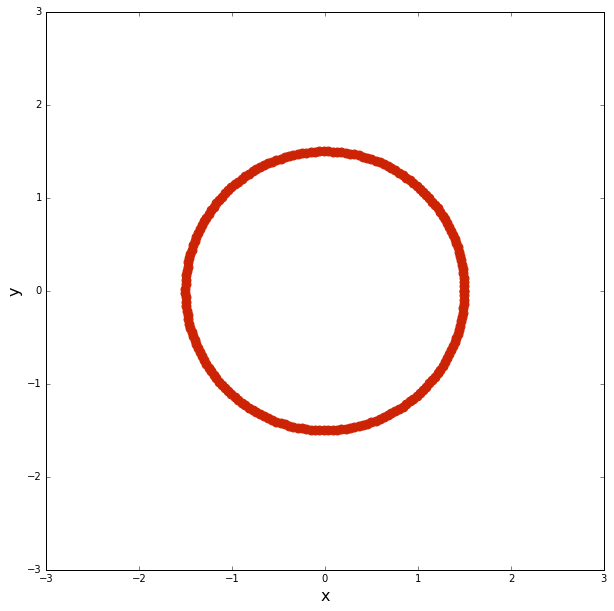

In [89]:
N = 200 # how many points
r = 1.5   # radio
a, b = 0, 0   # coordinates of the center
X, Y = circle(N, r, a, b)
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-r*2, r*2)
pyplot.ylim(-r*2, r*2)
pyplot.scatter(X, Y, color='#CD2305', s= 80, marker='o')

In [91]:
def transform(X, Y):
    z = X + Y * 1j
    t = z + 1/z
    return t

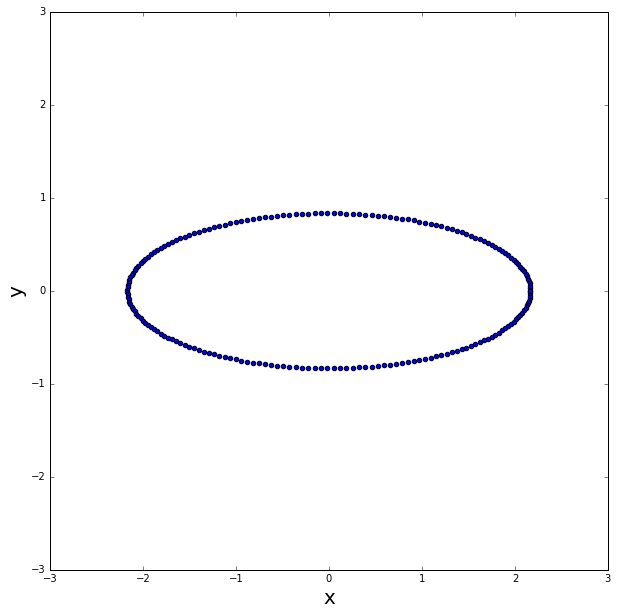

In [93]:
J = transform(X, Y)
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 20)
pyplot.ylabel('y', fontsize = 20)
pyplot.axes().set_aspect('equal', 'datalim') #make the equal axes
pyplot.scatter(J.real, J.imag)

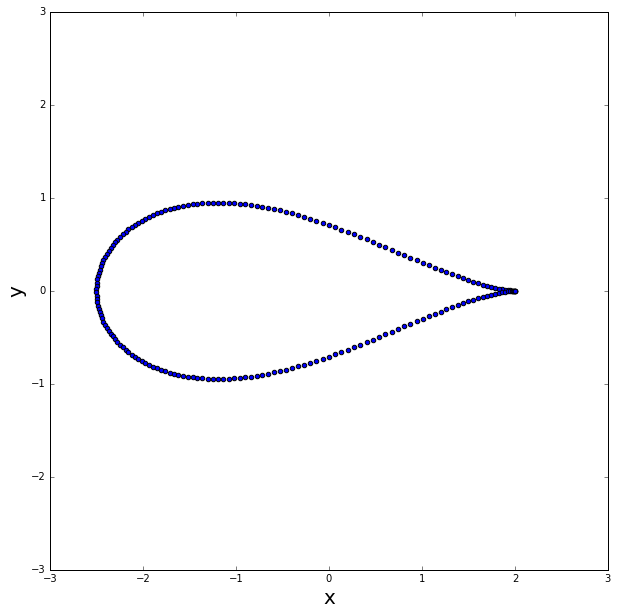

In [95]:
N = 200
c = 1
r = 1.5 # c < r < 2c
a, b = c - r, 0
X, Y = circle(N, r, a, b)
J = transform(X, Y)
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 20)
pyplot.ylabel('y', fontsize = 20)
pyplot.axes().set_aspect('equal', 'datalim') #make the equal axes
pyplot.scatter(J.real, J.imag)
# for question 2

In [97]:
def plot(N, r, a, b):
    X, Y = circle(N, r, a, b)
    J = transform(X, Y)
    size = 10
    pyplot.figure(figsize=(size, size))
    pyplot.xlabel('x', fontsize = 20)
    pyplot.ylabel('y', fontsize = 20)
    pyplot.axes().set_aspect('equal', 'datalim') 
    pyplot.scatter(J.real, J.imag)
    #define the plotting process, then i only have to enter the parameter to get the plotting

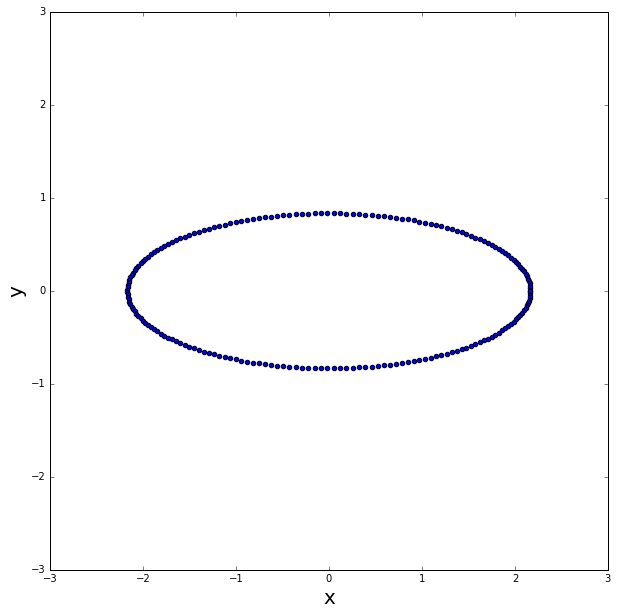

In [99]:
N = 200
r = 1.5
a, b = 0, 0
plot(N, r, a, b)
#little test

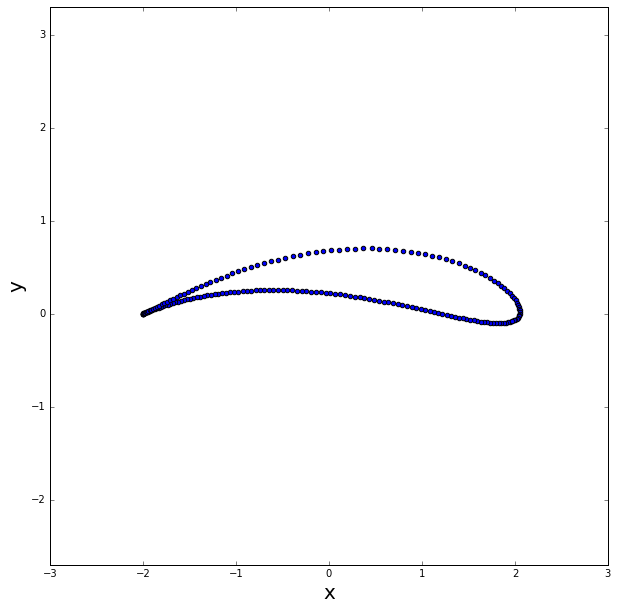

In [101]:
N = 200
x, y = 0.1, 0.2
c = 1
r = ((c-x)**2+y**2)**(1/2)
a, b = -x, y
plot(N, r, a, b)
# question 3

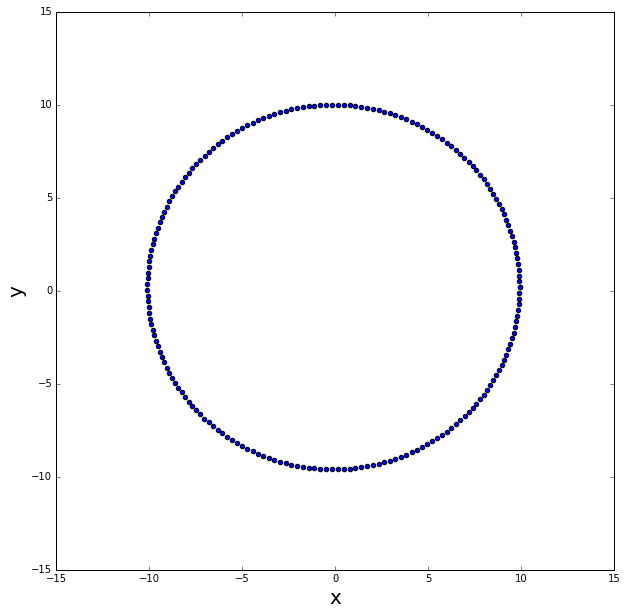

In [103]:
N = 200
x, y = 0.1, 0.2
c = 10
r = ((c-x)**2+y**2)**(1/2)
a, b = -x, y
plot(N, r, a, b)
# for question 3, when c is bigger enough, the shape will close to a circle, because x, y is small enough to be neglect

# 3. Grid points on the z-plane using polar coordinates

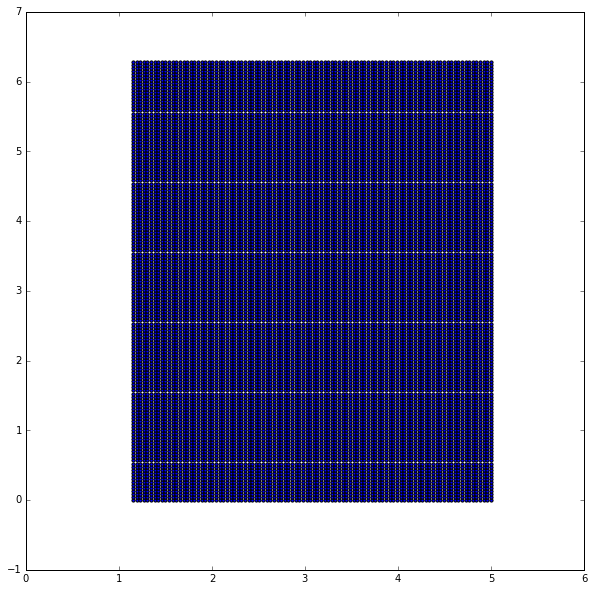

In [105]:
Nt = 145
Nr = 100
a, b = -0.15, 0
R = 1.15
c = 1
Thta = numpy.linspace(0, 2*numpy.pi, Nt)
r = numpy.linspace(R, 5, Nr)
r1, Thta1 = numpy.meshgrid(r, Thta)
size =10
pyplot.figure(figsize=(size,size))
pyplot.scatter(r1, Thta1, s= 10)
#get the grid

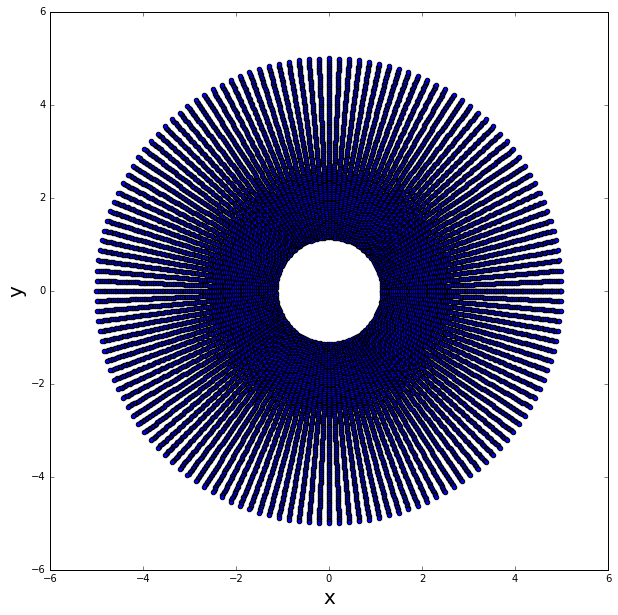

In [107]:
X = a + r1*numpy.cos(Thta1)
Y = b + r1*numpy.sin(Thta1)
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 20)
pyplot.ylabel('y', fontsize = 20)
pyplot.axes().set_aspect('equal', 'datalim') 
pyplot.scatter(X, Y)

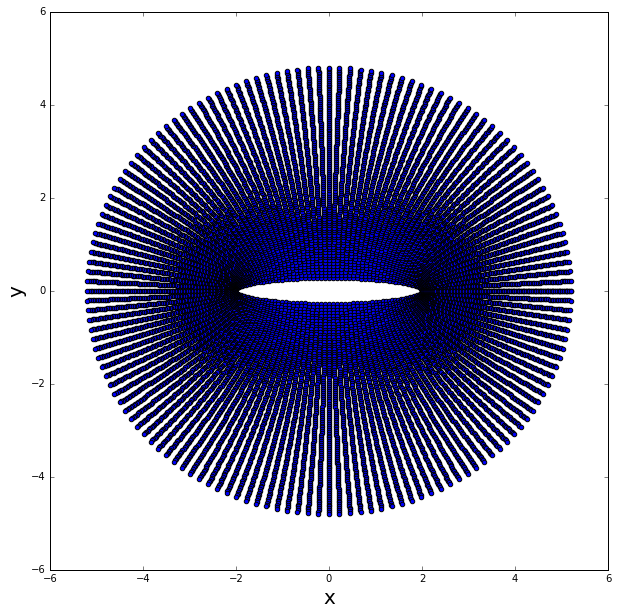

In [109]:
J = transform(X, Y)
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 20)
pyplot.ylabel('y', fontsize = 20)
pyplot.axes().set_aspect('equal', 'datalim') 
pyplot.scatter(J.real, J.imag)

# 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [111]:
u_inf = 1.0 #free stream velocity
strength = R**2*2*numpy.pi*u_inf
strength

8.309512568745001

In [113]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u,v

In [115]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [117]:
u_doublet, v_doublet = get_velocity_doublet(strength, a, b, X, Y)
psi_doublet = get_stream_function_doublet(strength, a, b, X, Y)

u_freestream = u_inf * numpy.ones((Nt, Nr), dtype=float)
v_freestream = numpy.zeros((Nt, Nr), dtype=float)
psi_freestream = u_inf * Y
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
#calculate the velocity field and the stream function

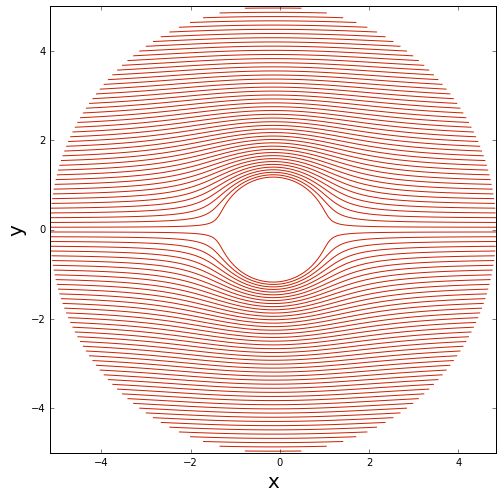

In [119]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.contour(X, Y, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=1, linestyles='solid')

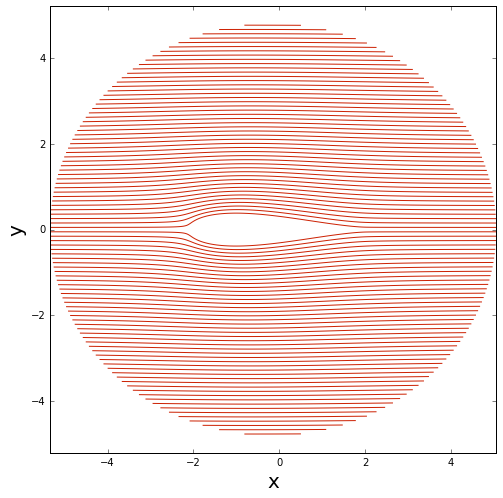

In [121]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.contour(J.real, J.imag, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=1, linestyles='solid')

Velocity vectors and pressure coefficients

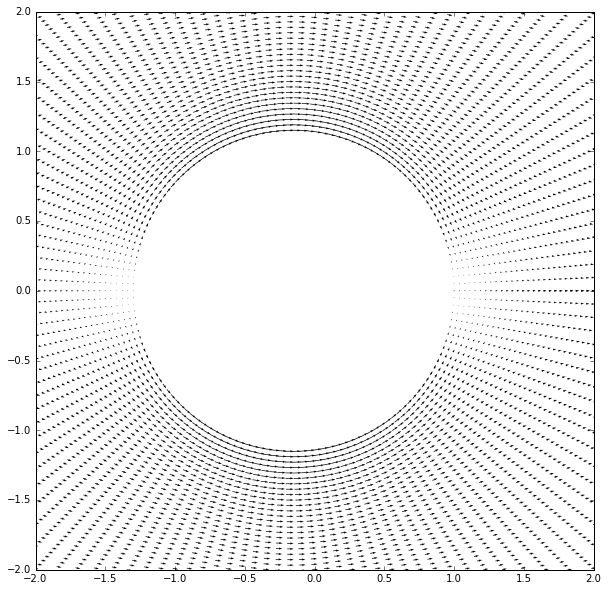

In [123]:
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlim(-2, 2)
pyplot.ylim(-2, 2)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.quiver(X, Y, u, v, units='xy',pivot='tip',width=0.005, scale=30)

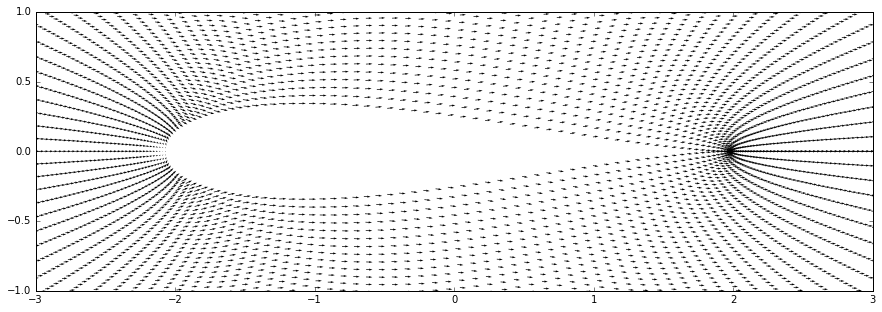

In [125]:
z = X + Y * 1j
W = (u - v * 1j)/(1 - (c/z)**2)
size = 5
pyplot.figure(figsize=(3*size, size))
pyplot.xlim(-3, 3)
pyplot.ylim(-1, 1)
pyplot.quiver(J.real, J.imag, W.real, W.imag, units='xy',pivot='tip',width=0.005,scale=25)

In [127]:
#The 62nd point 
print(W.real[61, 0])
print(W.imag[61, 0])

1.10633846629
-0.523633349298


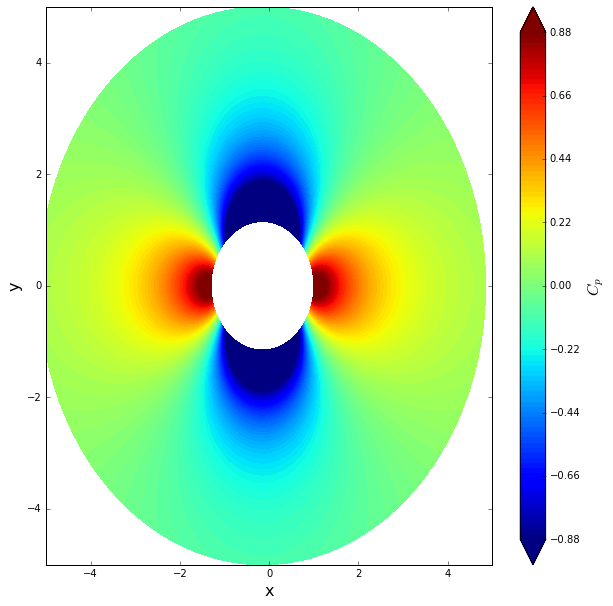

In [129]:
cp = 1.0 - (u**2+v**2)/u_inf**2
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])


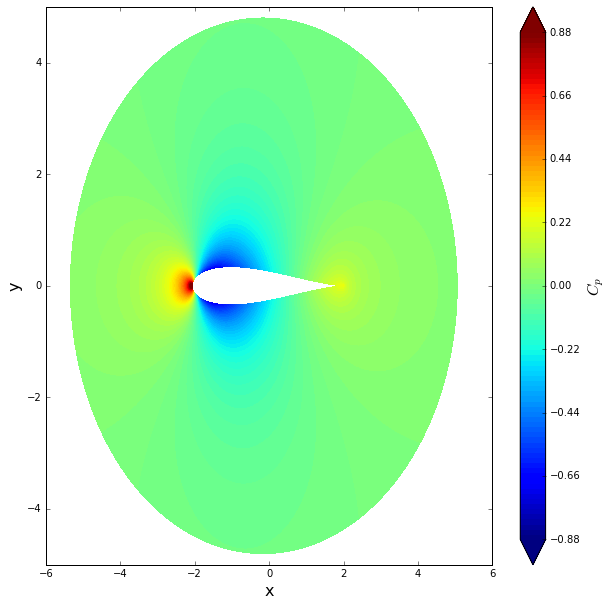

In [131]:
cp_transform = 1.0 - (W.real**2 + W.imag**2)/u_inf**2
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(J.real, J.imag, cp_transform, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])

In [133]:
numpy.min(cp_transform)

-0.68775567409240423

# 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [135]:
AoA = 20*numpy.pi/180 #angle
z_prime = (z - (a + b*1j))*numpy.exp(-AoA*1j)

psi_doublet = get_stream_function_doublet(strength, 0, 0, z_prime.real, z_prime.imag)
psi_freestream= u_inf*z_prime.imag
psi_prime =psi_freestream + psi_doublet

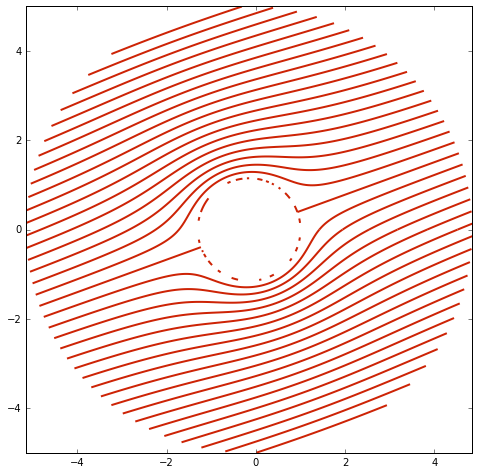

In [137]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.contour(X, Y, psi_prime, 40, colors='#CD2305', linewidths=2, linestyles='solid');

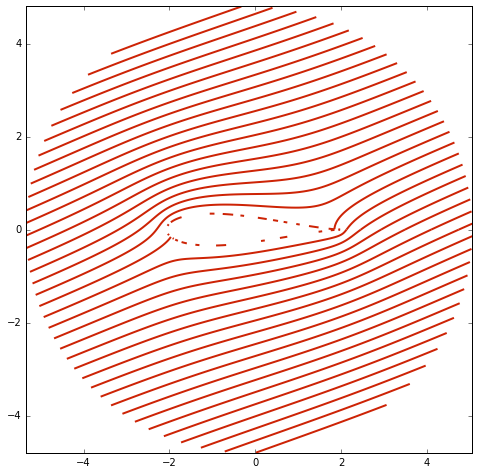

In [139]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.contour(J.real, J.imag, psi_prime,40 , colors='#CD2305', linewidths=2, linestyles='solid');

In [141]:
u_prime_doublet, v_prime_doublet = get_velocity_doublet(strength, 0, 0, z_prime.real, z_prime.imag) 
u_prime_freestream = u_inf
v_prime_freestream = 0
u_prime = u_prime_doublet + u_prime_freestream
v_prime = v_prime_doublet + v_prime_freestream
W = (u_prime - 1j*v_prime)*numpy.exp(-1j*AoA)
u_1 = W.real
v_1 = W.imag

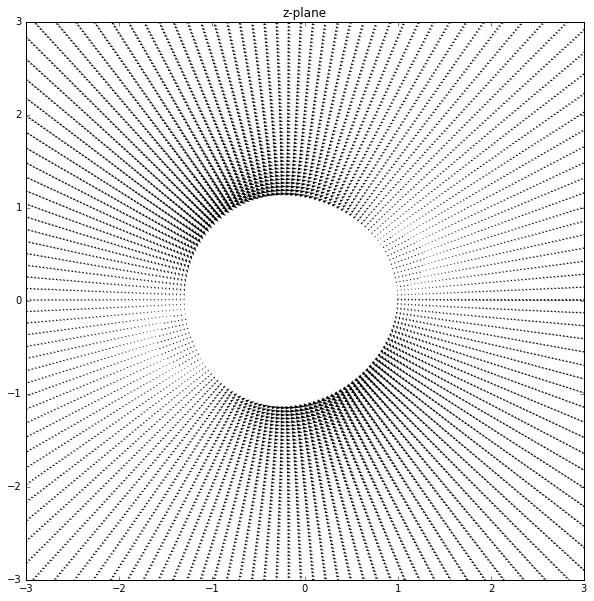

In [143]:
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.title('z-plane')
pyplot.quiver(X, Y, u_1, v_1, pivot='tip', scale_units='xy', scale=30)

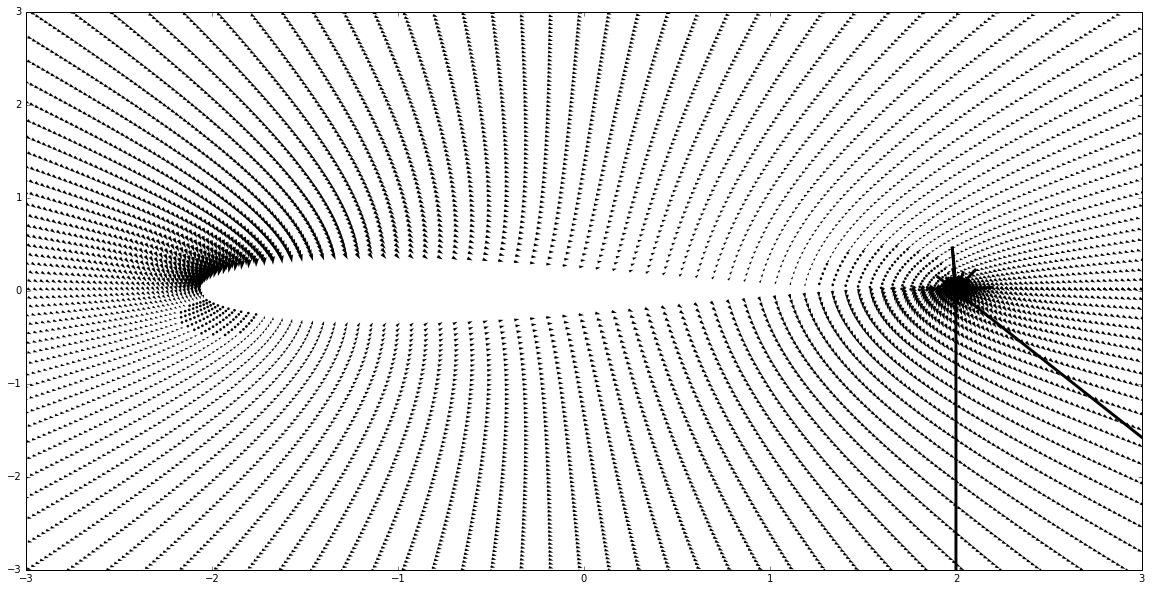

In [145]:
W2 = (u_1 - v_1*1j)/(1-(c/z)**2)
size = 10
pyplot.figure(figsize=(2*size, size))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(J.real, J.imag, W2.real, -W2.imag, units='xy', pivot='tip', width=0.02, scale=30)

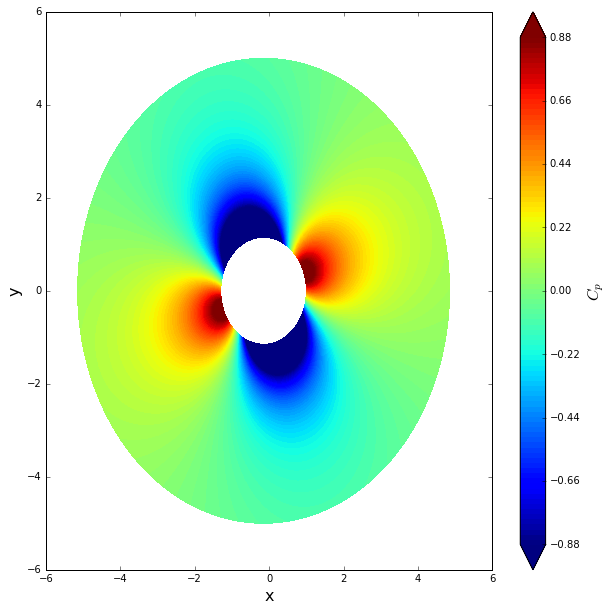

In [147]:
cp2 = 1.0 - (u_1**2+v_1**2)/u_inf**2
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
contf = pyplot.contourf(X, Y, cp2, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])

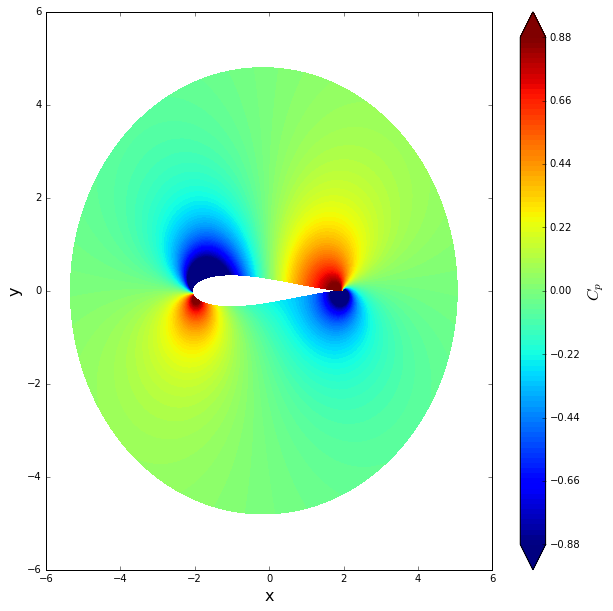

In [149]:
cp_transform2 = 1.0 - (W2.real**2 + W2.imag**2)/u_inf**2
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
contf = pyplot.contourf(J.real, J.imag, cp_transform2, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])

In [162]:
numpy.where(cp_transform2 == 1.0)

(array([ 8, 80]), array([0, 0]))

In [151]:
W2.real[49, 0]

0.71021926586165685

In [153]:
W2.imag[49, 0]

1.305200948663745

In [157]:
cp_transform2[74,0]

-0.48520991643726008

# 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation¶


In [170]:
gamma = 4*numpy.pi * R*numpy.sin(AoA) * u_inf
gamma

4.9426446603975842

In [178]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

In [179]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [188]:
u_vortex, v_vortex = get_velocity_vortex(gamma, 0.0, 0.0, z_prime.real, z_prime.imag)
psi_vortex = get_stream_function_vortex(gamma, 0.0, 0.0, z_prime.real, z_prime.imag)
u = u_prime + u_vortex
v = v_prime + v_vortex
psi = psi_prime + psi_vortex

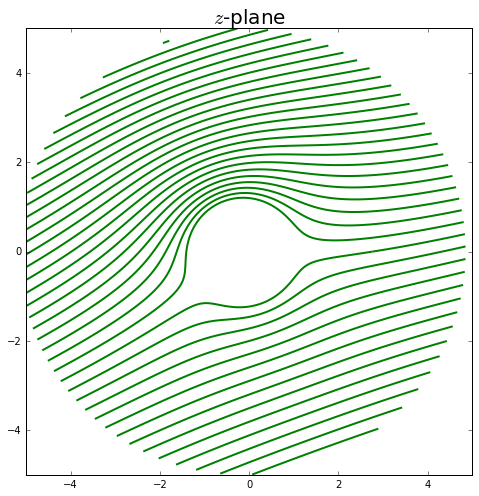

In [198]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
pyplot.contour(X, Y, psi, 40, colors='g', linewidths=2, linestyles='solid');

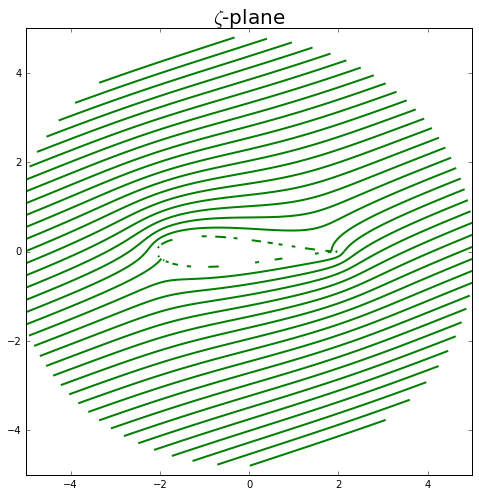

In [199]:
size = 8
pyplot.figure(figsize=(size, size))
pyplot.title('$\zeta$-plane', fontsize=20)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
pyplot.contour(J.real, J.imag, psi_prime, 40, colors='g', linewidths=2, linestyles='solid');

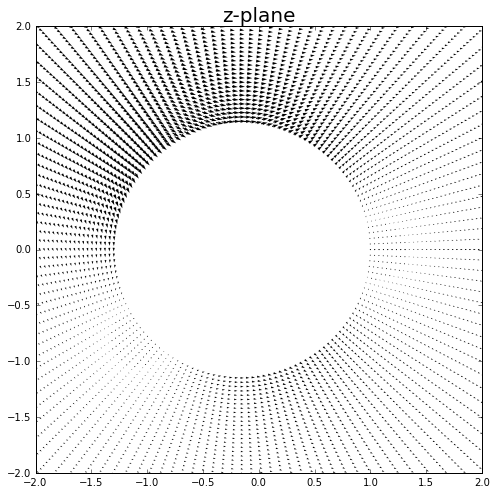

In [209]:
W3 = (u - 1j*v) * numpy.exp(-1j*AoA)
size = 8
pyplot.figure(figsize =(size,size))
pyplot.xlim(-2, 2)
pyplot.ylim(-2, 2)
pyplot.title('z-plane', fontsize=20)
pyplot.quiver(X, Y, W3.real, W3.imag, pivot='mid', scale_units='xy', scale=40)

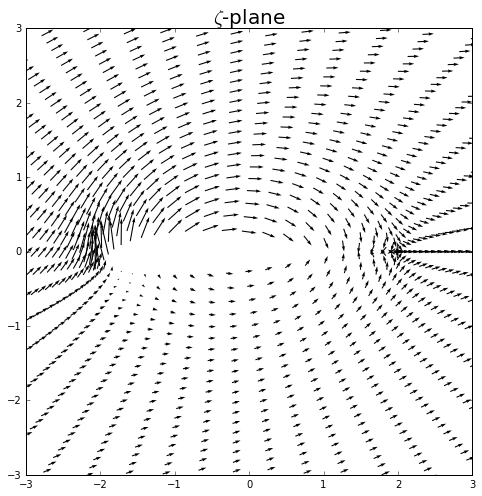

In [220]:
W4 = (W3.real - 1j*W3.imag)/(1-(c/z)**2)
size = 8
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('$\zeta$-plane', fontsize=20)
pyplot.quiver(J.real[::3, ::3], J.imag[::3, ::3], W4.real[::3, ::3], W4.imag[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)

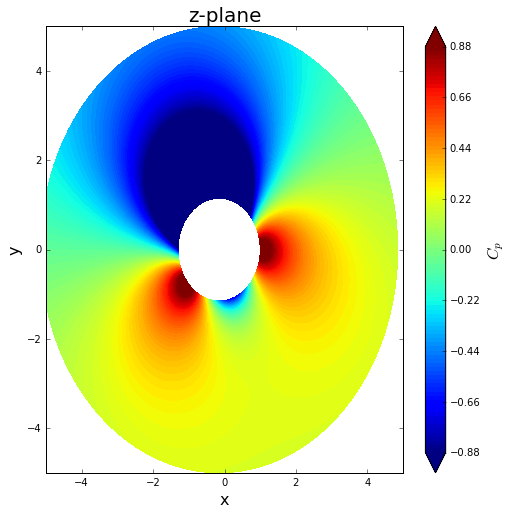

In [214]:
cp4 = 1.0 - ((W3.real**2 + W3.imag**2)/u_inf**2)
size= 8
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y',fontsize =16) 
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5) 
pyplot.title('z-plane', fontsize= 20)
contf = pyplot.contourf(X, Y, cp4, levels=numpy.linspace(-0.88, 0.88, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])

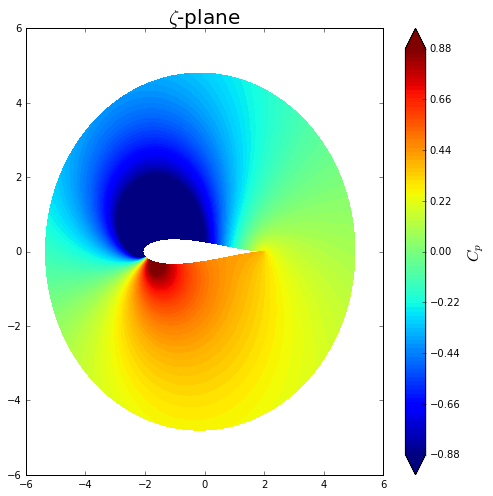

In [222]:
cp5 = 1.0 - ((W4.real**2 + W4.imag**2)/u_inf**2)
size= 8 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6) 
pyplot.title('$\zeta$-plane', fontsize=20)
contf = pyplot.contourf(J.real, J.imag, cp5, levels=numpy.linspace(-0.88, 0.88, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
k = 0.22
cbar.set_ticks([-4*k, -3*k, -2*k, -k, 0, k, 2*k, 3*k, 4*k])

In [174]:
Lift = u_inf*numpy.cos(AoA)*gamma
Lift

4.6445667145424823

In [228]:
cp5[111,0]

0.48591108800805083